In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

The objective of this excercise is to identify any patterns or interesting insights which could be helpful to understand any trends in the telecom industry. Let's dive right in.

In [15]:
# import the data from csv file downloaded from the link above
telecom_churn = pd.read_csv('telecom_churn.csv')

In [3]:
# For any data analysis task we will first understand the dataset and its attributes.
telecom_churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


* From the above dataset, we can see that the data is on account level and is utilizing some continuous variables like the customer's calling habits in one whole day. The col Churn is identifying wheather the account is churned or not. We can utilize this field to find out any pattern in accounts that have churned and might provide any remideation/action to avoid such churn.

In [4]:
# the data-set doesn't have any NULL values in it and has 3333 records with 20 cols.
telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [5]:
telecom_churn.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [21]:
# some data transformations
# replace " " with "_" in the column name, incase we end up using .query() later on
telecom_churn.columns = [columns.replace(" ","_")
                         .lower() for columns in telecom_churn.columns]

# convert false to 0 and true to 1 for Churn identifier
telecom_churn['churn'] = telecom_churn['churn'].apply(lambda x : 1 if x else 0)

# # get top records for the dataframe
telecom_churn.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


If you ask me, if I'm constantly on the phone with a customer rep of a telecom company, I'm either having too many problems with the service and I'm not happy or I'm just too lonely and just want to talk to someone :)

Would you say there is a correlation between these continuous variables (customer_service_calls and churn)? PS: No strong correlation found ~

In [60]:
corr = telecom_churn.corr()
corr.style.background_gradient(cmap='coolwarm')

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
account_length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area_code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number_vmail_messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total_day_minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total_day_calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total_day_charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total_eve_minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total_eve_calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total_eve_charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total_night_minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


What are average values of numerical features for churned users?

In [63]:
telecom_churn[telecom_churn["churn"] == 1].mean()

C:\Users\heman\AppData\Local\Temp\ipykernel_5332\4187413108.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  telecom_churn[telecom_churn["churn"] == 1].mean()


account_length            102.664596
area_code                 437.817805
number_vmail_messages       5.115942
total_day_minutes         206.914079
total_day_calls           101.335404
total_day_charge           35.175921
total_eve_minutes         212.410145
total_eve_calls           100.561077
total_eve_charge           18.054969
total_night_minutes       205.231677
total_night_calls         100.399586
total_night_charge          9.235528
total_intl_minutes         10.700000
total_intl_calls            4.163561
total_intl_charge           2.889545
customer_service_calls      2.229814
churn                       1.000000
dtype: float64

What is the maximum length of international calls among loyal users (Churn == 0) who do not have an international plan?

In [66]:
telecom_churn[(telecom_churn['churn'] == 1) & (telecom_churn['international_plan'] == 'No')]['total_intl_minutes'].max()

18.3

In [89]:
# whats the % of churn in this dataset?
telecom_churn["churn"].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

In [68]:
columns_to_show = ["total_day_minutes", "total_eve_minutes", "total_night_minutes"]

telecom_churn.groupby(["churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

total_day_minutes                        total_eve_minutes             \
                   mean        std amin   amax              mean        std   
churn                                                                         
0            175.175754  50.181655  0.0  315.6        199.043298  50.292175   
1            206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   total_night_minutes                          
       amin   amax                mean        std  amin   amax  
churn                                                           
0       0.0  361.8          200.133193  51.105032  23.2  395.0  
1      70.9  363.7          205.231677  47.132825  47.4  354.9

In [80]:
telecom_churn["total_charge"] = (
    telecom_churn["total_day_charge"]
    + telecom_churn["total_eve_charge"]
    + telecom_churn["total_night_charge"]
    + telecom_churn["total_intl_charge"]
)
telecom_churn.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09


Lets dig deep into how does having an international plan effects the customer churn? PS: quite a lot!

In [71]:
pd.crosstab(telecom_churn["churn"], telecom_churn["international_plan"] , normalize = True)

international_plan,No,Yes
churn,,
0,0.79928,0.055806
1,0.10381,0.041104


In [73]:
# some imports to set up plotting
import matplotlib.pyplot as plt
# pip install seaborn
import seaborn as sns

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

<AxesSubplot:xlabel='international_plan', ylabel='count'>

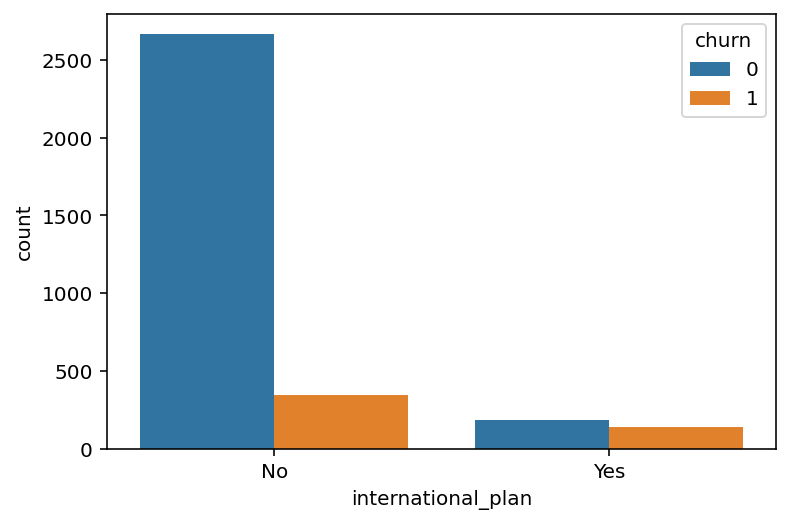

In [75]:
sns.countplot(x="international_plan", hue="churn", data=telecom_churn)

Of the total people on international plan we see that the churn rate is much higher. This could be an indicator of poor international calls or overall more charges incured to cutomer having intl plan

In [76]:
pd.crosstab(telecom_churn["churn"], telecom_churn["customer_service_calls"], margins=True)

customer_service_calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


<AxesSubplot:xlabel='customer_service_calls', ylabel='count'>

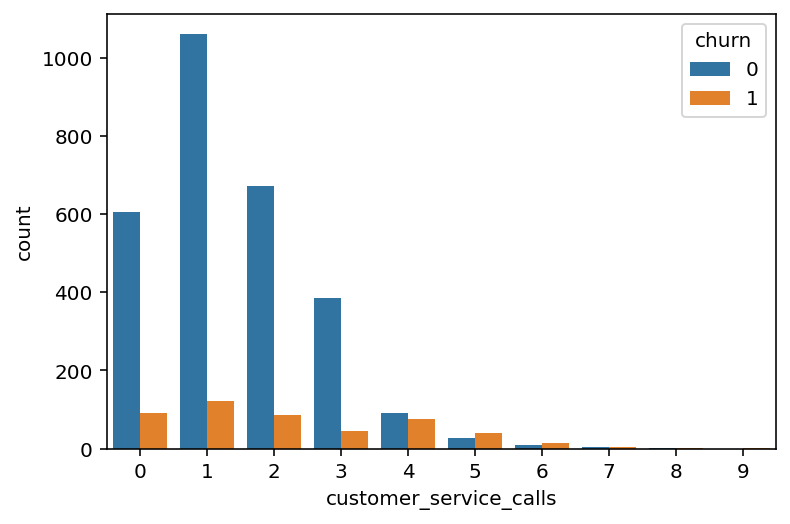

In [77]:
sns.countplot(x="customer_service_calls", hue="churn", data=telecom_churn)

We can see that with increasing number of calls the churn rate also increases, which can be identified as a potential tigger of churn. Hence for more cool deals from Telecom companies keep calling them about any small grivience you may see, you might end up with a better deal than you currently have :P

For our dataset let's create a field which can flag anytime we have number of calls greater than or equal to 4 (why? see the chart above).

In [82]:
telecom_churn['too_many_calls'] = (telecom_churn['customer_service_calls'] >= 4).astype('int64')
pd.crosstab(telecom_churn["too_many_calls"], telecom_churn["churn"], margins=True)

churn,0,1,All
too_many_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


<AxesSubplot:xlabel='too_many_calls', ylabel='count'>

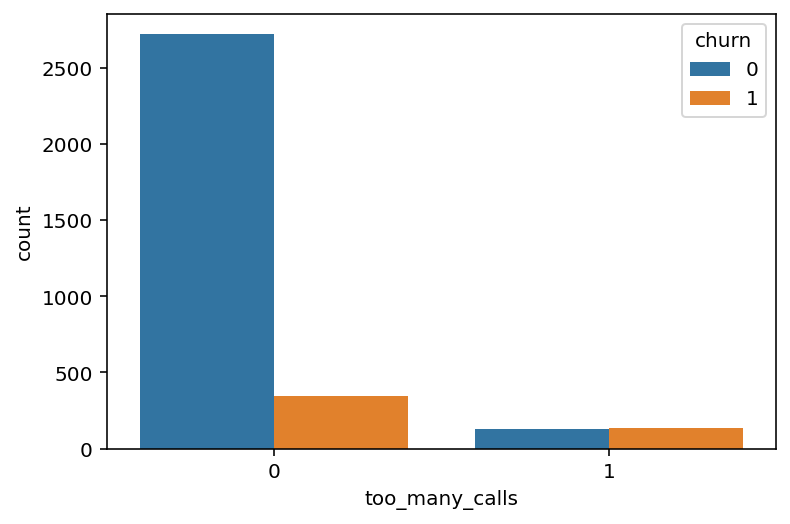

In [83]:
sns.countplot(x='too_many_calls', hue = 'churn', data = telecom_churn)

In [87]:
telecom_churn['international_plan']

0        No
1        No
2        No
3       Yes
4       Yes
       ... 
3328     No
3329     No
3330     No
3331    Yes
3332     No
Name: international_plan, Length: 3333, dtype: object

In [88]:
pd.crosstab(telecom_churn['too_many_calls'] & (telecom_churn['international_plan'] == 'Yes'), telecom_churn['churn'])

churn,0,1
row_0,,
False,2841,464
True,9,19


With the help of a simple forecast that can be expressed by the following formula: "International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0", we can expect a guessing rate of 85.8%